<a href="https://colab.research.google.com/github/vhmartinsp/-Redu-o-de-Dimensionalidade-em-Imagens-para-Redes-Neurais/blob/main/Redu%C3%A7%C3%A3o_de_Dimensionalidade_de_imagem_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [12]:
!wget https://github.com/vhmartinsp/-Redu-o-de-Dimensionalidade-em-Imagens-para-Redes-Neurais/raw/main/jean-michel-basquiat.jpg



--2025-01-25 01:10:31--  https://github.com/vhmartinsp/-Redu-o-de-Dimensionalidade-em-Imagens-para-Redes-Neurais/raw/main/jean-michel-basquiat.jpg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vhmartinsp/-Redu-o-de-Dimensionalidade-em-Imagens-para-Redes-Neurais/main/jean-michel-basquiat.jpg [following]
--2025-01-25 01:10:31--  https://raw.githubusercontent.com/vhmartinsp/-Redu-o-de-Dimensionalidade-em-Imagens-para-Redes-Neurais/main/jean-michel-basquiat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12342 (12K) [image/jpeg]
Saving to: ‘jean-michel-basquiat.jpg’

jean-michel-basquia 100%

# Carregamento da imagem

In [13]:
image = Image.open('jean-michel-basquiat.jpg')


Cada imagem tem 3 dimensões (altura, largura e valores das cores dos pixels). Neste caso alterarei apenas a escala de cores

Separarei os canais de cor (vermelho, verde e azul) da imagem carregada em um array NumPy
O índice 0 representa canal vermelho (R)
O índice 1 representa canal verde (G)
O índice 2 representa o canal azul (B)

In [14]:
image_rgb = np.array(image)  # Converter a imagem em um array NumPy
r, g, b = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]


In [16]:
imagem_cinza = 0.299 * r + 0.587 * g + 0.114 * b


In [22]:
imagem_cinza

array([[230.778, 173.376, 202.376, ..., 174.444, 174.444, 174.444],
       [179.148, 102.735, 117.735, ...,  36.145,  36.145,  36.145],
       [189.507, 100.507, 108.507, ...,  31.444,  32.444,  33.558],
       ...,
       [188.892,  51.006,  52.006, ...,  19.985,  19.985,  19.985],
       [190.006,  51.006,  52.006, ...,  21.985,  21.985,  21.985],
       [190.006,  51.006,  52.006, ...,  24.284,  24.284,  24.284]])

Agora com as imagens em tons de cinza, farei a conversão para preto e banco

In [21]:
# Passo 2: Converter Tons de Cinza para Preto e Branco Manualmente (Thresholding)
threshold = 127  # Definir o limiar
imagem_pb = np.where(imagem_cinza > threshold, 255, 0)  # Aplicar o threshold

In [23]:
imagem_pb

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]])

In [26]:
# Converter as imagens de volta para o formato de imagem do PIL
imagem_cinza_pil = Image.fromarray(imagem_cinza.astype(np.uint8))
imagem_pb_pil = Image.fromarray(imagem_pb.astype(np.uint8))

# Exibição das 3 imagens

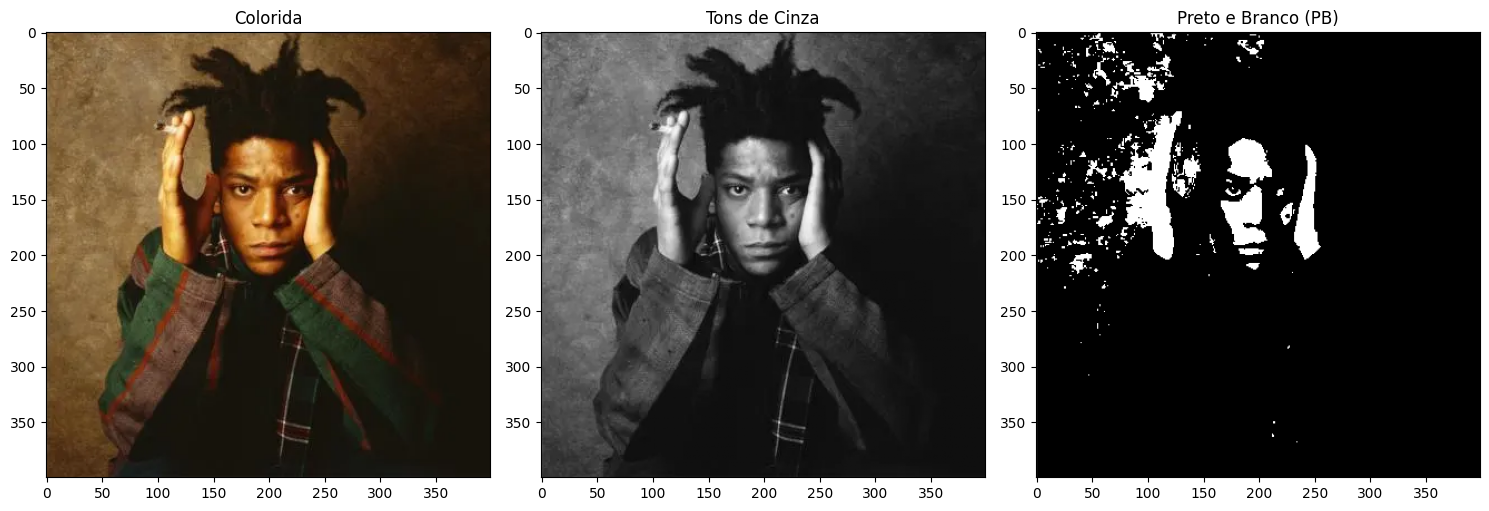

In [28]:
# Exibir as três imagens
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Colorida")
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title("Tons de Cinza")
plt.imshow(imagem_cinza_pil, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Preto e Branco (PB)")
plt.imshow(imagem_pb_pil, cmap='gray')

plt.tight_layout()
plt.show()